In [1]:
# Dependencies and Setup
import pandas as pd

# File to Load (Remember to Change These)
school_data_to_load = "Resources/schools_complete.csv"
student_data_to_load = "Resources/students_complete.csv"

# Read School and Student Data File and store into Pandas DataFrames
school_data = pd.read_csv(school_data_to_load)
student_data = pd.read_csv(student_data_to_load)

# Combine the data into a single dataset.  
school_data_complete = pd.merge(student_data, school_data, how="left", on=["school_name", "school_name"])

# Data Preparation

In [3]:
# Creating passing grade function
def pass70(x):
    return x[x>=70].count()/len(x)*100

# Cleaning data 
school_data_complete['grade'] = school_data_complete['grade'].map(lambda x: int(x.replace('th','')))
del school_data_complete['Student ID']

# Creating boolean column for passing both tests
school_data_complete["both_pass"] = (school_data_complete['math_score']>=70)&(school_data_complete['reading_score']>=70)

# Set new index to school_name and assign data to the new DataFrame: df
df = school_data_complete.set_index("school_name",drop=True)

# Creating passing both tests data frame and assigning values to pass_selection
pass_df = df.loc[df['both_pass']==True]
pass_selection = pass_df.groupby(["both_pass", pass_df.index])["both_pass"].count().values

* Global variables description

In [4]:
global schools_list, grades_list
schools_list = school_data_complete.school_name.unique()
schools_number =len(schools_list)
grades_list = sorted(school_data_complete.grade.unique())
unique_stud = len(school_data_complete.student_name.unique())
tot_stud = len(school_data_complete)
tot_budget = school_data_complete.budget.unique().sum()

# School Summary

In [5]:
# Creating grades_df (data frame of student average scores and pass results)
pass_grades_df = school_data_complete.groupby(df.index)[['math_score', 'reading_score']].agg(pass70).add_suffix("_%pass")
mean_grades_df = school_data_complete.groupby(df.index)[['math_score', 'reading_score']].mean().add_suffix("_avg")
grades_df = mean_grades_df.merge(pass_grades_df, left_index=True, right_index=True)

# Creating summary data across schools
tot_stud_df = school_data_complete.groupby(df.index)['size'].count()
tot_budget_df = school_data_complete.groupby(df.index)['budget'].sum()/tot_stud_df
tot_size_df = school_data_complete.groupby(df.index)['size'].sum()/tot_stud_df
overall_pass = pass_selection/tot_stud_df*100

#Converting list of unique type school names into a flat list school_type 
school_type = school_data_complete.groupby(df.index)['type'].unique()
school_type = [ item for elem in school_type for item in elem]

# Creating total_df (data frame with summary data)
df_data = list(zip(school_type, tot_stud_df, tot_budget_df, tot_budget_df/tot_stud_df, overall_pass))
col_list = ["School Type", "Tot Students", "Tot School Budget", "Per Student Budget", "% Overall Passing"]
total_df = pd.DataFrame(df_data, columns = col_list)

# Creating sum_df (merged data frame of total_df and grades_df)
sum_df = pd.merge(total_df, grades_df, on=grades_df.index).set_index(grades_df.index)
del sum_df['key_0']
sum_df.rename(columns={'math_score_avg': 'Average Math Score', 'reading_score_avg': 'Average Read Score',
                      'math_score_%pass':'% Pass Math', 'reading_score_%pass': '% Pass Read'}, inplace=True)

In [6]:
sum_df

,School Type,Tot Students,Tot School Budget,Per Student Budget,% Overall Passing,Average Math Score,Average Read Score,% Pass Math,% Pass Read
school_name,,,,,,,,,
Bailey High School,District,4976,3124928.0,628.0,54.642283,77.048432,81.033963,66.680064,81.933280
Cabrera High School,Charter,1858,1081356.0,582.0,91.334769,83.061895,83.975780,94.133477,97.039828
Figueroa High School,District,2949,1884411.0,639.0,53.204476,76.711767,81.158020,65.988471,80.739234
Ford High School,District,2739,1763916.0,644.0,54.289887,77.102592,80.746258,68.309602,79.299014
Griffin High School,Charter,1468,917500.0,625.0,90.599455,83.351499,83.816757,93.392371,97.138965
Hernandez High School,District,4635,3022020.0,652.0,53.527508,77.289752,80.934412,66.752967,80.862999
Holden High School,Charter,427,248087.0,581.0,89.227166,83.803279,83.814988,92.505855,96.252927
Huang High School,District,2917,1910635.0,655.0,53.513884,76.629414,81.182722,65.683922,81.316421
Johnson High School,District,4761,3094650.0,650.0,53.539172,77.072464,80.966394,66.057551,81.222432


# District Summary

In [17]:
# Creating district summary data frame district_df 
header_list = sum_df.columns.values
math_avg = school_data_complete['math_score'].mean()
math_pass = pass70(school_data_complete['math_score'])
read_avg = school_data_complete['reading_score'].mean() 
read_pass = pass70(school_data_complete['reading_score'])
both_pass = len(pass_df)/tot_stud*100
district_data = [schools_number, "{0:,}".format(tot_stud), "${:,.2f}".format(tot_budget), "${:,.2f}".format(tot_budget/tot_stud),
                 both_pass, math_avg, read_avg, math_pass, read_pass]
district_df = pd.DataFrame(columns = header_list)
district_df.loc[0] = district_data

border = "#"*128
pd.set_option('display.max_colwidth', 20)
pd.options.display.float_format = '{:,.2f}'.format
print("\nDistrict Summary\n{}\nTotal budget: ${:,}\nTotal number of schools: {}".format(border, tot_budget, schools_number))
print("Total number of students: by school records - {:,}, by unique name - {:,}\n{}".format(tot_stud, unique_stud, border))
district_df.rename(columns={'School Type': 'Tot Schools'}, inplace=True)
district_df


District Summary
################################################################################################################################
Total budget: $24,649,428
Total number of schools: 15
Total number of students: by school records - 39,170, by unique name - 32,715
################################################################################################################################


,Tot Schools,Tot Students,Tot School Budget,Per Student Budget,% Overall Passing,Average Math Score,Average Read Score,% Pass Math,% Pass Read
0,15,"39,170","$24,649,428.00",$629.29,65.17,78.99,81.88,74.98,85.81


## Top Performing Schools (By % Overall Passing)

* Sort and display the top five performing schools by % overall passing.

In [8]:
sum_df.sort_values('% Overall Passing', ascending = False).head()

,School Type,Tot Students,Tot School Budget,Per Student Budget,% Overall Passing,Average Math Score,Average Read Score,% Pass Math,% Pass Read
school_name,,,,,,,,,
Cabrera High School,Charter,1858,"1,081,356.00",582.00,91.33,83.06,83.98,94.13,97.04
Thomas High School,Charter,1635,"1,043,130.00",638.00,90.95,83.42,83.85,93.27,97.31
Griffin High School,Charter,1468,"917,500.00",625.00,90.60,83.35,83.82,93.39,97.14
Wilson High School,Charter,2283,"1,319,574.00",578.00,90.58,83.27,83.99,93.87,96.54
Pena High School,Charter,962,"585,858.00",609.00,90.54,83.84,84.04,94.59,95.95


## Bottom Performing Schools (By % Overall Passing)

* Sort and display the five worst-performing schools by % overall passing.

In [9]:
sum_df.sort_values('% Overall Passing', ascending = True).head()

,School Type,Tot Students,Tot School Budget,Per Student Budget,% Overall Passing,Average Math Score,Average Read Score,% Pass Math,% Pass Read
school_name,,,,,,,,,
Rodriguez High School,District,3999,"2,547,363.00",637.00,52.99,76.84,80.74,66.37,80.22
Figueroa High School,District,2949,"1,884,411.00",639.00,53.20,76.71,81.16,65.99,80.74
Huang High School,District,2917,"1,910,635.00",655.00,53.51,76.63,81.18,65.68,81.32
Hernandez High School,District,4635,"3,022,020.00",652.00,53.53,77.29,80.93,66.75,80.86
Johnson High School,District,4761,"3,094,650.00",650.00,53.54,77.07,80.97,66.06,81.22


## Math and Reading Scores by Grade

  * Create a table that lists the average Math and Reading Score for students of each grade level (9th, 10th, 11th, 12th) at each school.

  * Create a pandas series for each grade. Hint: use a conditional statement.
  
  * Group each series by school
  
  * Combine the series into a dataframe
  
  * Optional: give the displayed data cleaner formatting

In [10]:
def grades_summary (df_grades, score):
    """Summary Analysis of a DataFrame over Grade Score
    Args:
        df_grades (DataFrame): Given DataFrame
        score (str):    Type of score for analysis
    Returns:
        df (DataFrame): Analysis output
    """
    df = pd.DataFrame()
    mean_list =[]
    for i in range(len(schools_list)):
        for j in range(len(grades_list)):
            group_df = df_grades.loc[df_grades["grade"]==grades_list[j]]
            mean_list.append(group_df.loc[group_df.index == schools_list[i],:][score].mean())
        df.insert(i, schools_list[i], mean_list)
        mean_list=[]
    df.insert(i+1, "school_name", grades_list)
    df = df.set_index("school_name").transpose().add_suffix("th")
    return df

In [11]:
grades_summary(df, 'math_score').sort_index()

school_name,9th,10th,11th,12th
Bailey High School,77.08,77.00,77.52,76.49
Cabrera High School,83.09,83.15,82.77,83.28
Figueroa High School,76.40,76.54,76.88,77.15
Ford High School,77.36,77.67,76.92,76.18
Griffin High School,82.04,84.23,83.84,83.36
Hernandez High School,77.44,77.34,77.14,77.19
Holden High School,83.79,83.43,85.00,82.86
Huang High School,77.03,75.91,76.45,77.23
Johnson High School,77.19,76.69,77.49,76.86
Pena High School,83.63,83.37,84.33,84.12


In [12]:
grades_summary(df, 'reading_score').sort_index()

school_name,9th,10th,11th,12th
Bailey High School,81.30,80.91,80.95,80.91
Cabrera High School,83.68,84.25,83.79,84.29
Figueroa High School,81.20,81.41,80.64,81.38
Ford High School,80.63,81.26,80.40,80.66
Griffin High School,83.37,83.71,84.29,84.01
Hernandez High School,80.87,80.66,81.40,80.86
Holden High School,83.68,83.32,83.82,84.70
Huang High School,81.29,81.51,81.42,80.31
Johnson High School,81.26,80.77,80.62,81.23
Pena High School,83.81,83.61,84.34,84.59


## Scores by School Spending

* Create a table that breaks down school performances based on average Spending Ranges (Per Student). Use 4 reasonable bins to group school spending. Include in the table each of the following:
  * Average Math Score
  * Average Reading Score
  * % Passing Math
  * % Passing Reading
  * Overall Passing Rate (Average of the above two)

In [195]:
# Create the new data frame and the bins in which Data will be held
budget_df = sum_df.filter(['Per Student Budget', 'Average Math Score', 'Average Read Score',
                          '% Pass Math', '% Pass Read', '% Overall Passing'], axis=1)
group_names = ["<584", "585-629", "630-644", "645-675"]
budget_df["Spending Ranges"] = pd.cut(budget_df["Per Student Budget"], bins=[0, 585, 630, 645, 675], right = False, labels=group_names)
# Creating a group based off of the bins
budget_df = budget_df.groupby("Spending Ranges").mean()
del budget_df['Per Student Budget']
budget_df

,Average Math Score,Average Read Score,% Pass Math,% Pass Read,% Overall Passing
Spending Ranges,,,,,
<584,83.46,83.93,93.46,96.61,90.37
585-629,81.90,83.16,87.13,92.72,81.42
630-644,78.52,81.62,73.48,84.39,62.86
645-675,77.00,81.03,66.16,81.13,53.53


## Scores by School Size

* Perform the same operations as above, based on school size.

In [197]:
# Create the new data frame and the bins in which Data will be held
size_df = sum_df.filter(['Tot Students', 'Average Math Score', 'Average Read Score',
                          '% Pass Math', '% Pass Read', '% Overall Passing'], axis=1)
group_names = ["<1000", "1000-2000", "2000-5000"]
size_df["School Size"] = pd.cut(size_df['Tot Students'], bins=[0, 1000, 2000, 5000], right=False, labels=group_names, include_lowest=True)
# Creating a group based off of the bins
size_df = size_df.groupby("School Size").mean()
del size_df['Tot Students']
size_df

,Average Math Score,Average Read Score,% Pass Math,% Pass Read,% Overall Passing
School Size,,,,,
<1000,83.82,83.93,93.55,96.10,89.88
1000-2000,83.37,83.86,93.60,96.79,90.62
2000-5000,77.75,81.34,69.96,82.77,58.29


## Scores by School Type (based on the full original data frame)

* Perform the same operations as above, based on school type

In [86]:
scores_mean = school_data_complete.groupby('type')[['math_score', 'reading_score']].mean()
scores_pass = school_data_complete.groupby('type')[['math_score', 'reading_score']].agg(pass70)

charter_df = school_data_complete[school_data_complete['type']=='Charter']
district_df = school_data_complete[school_data_complete['type']=='District']
charter_pass = charter_df[charter_df['both_pass']==True].count()/len(charter_df)
district_pass = district_df[district_df['both_pass']==True].count()/len(district_df)
overall_pass = [charter_pass['both_pass']*100, district_pass['both_pass']*100]

school_type_df = pd.concat([scores_mean, scores_pass], join='outer', axis=1)
school_type_df['overall_pass'] = overall_pass
school_type_df

,math_score,reading_score,math_score,reading_score,overall_pass
type,,,,,
Charter,83.41,83.90,93.70,96.65,90.56
District,76.99,80.96,66.52,80.91,53.70


## Scores by School Type (based on the school summary data frame)

In [134]:
scores_mean = sum_df.groupby('School Type')[['Average Math Score', 'Average Read Score']].mean()
scores_pass = sum_df.groupby('School Type')[['% Pass Math','% Pass Read']].mean()
overall_pass = sum_df.groupby('School Type')['% Overall Passing'].mean()
school_type_df = pd.concat([scores_mean, scores_pass, overall_pass], join='outer', axis=1)
school_type_df

,Average Math Score,Average Read Score,% Pass Math,% Pass Read,% Overall Passing
School Type,,,,,
Charter,83.47,83.90,93.62,96.59,90.43
District,76.96,80.97,66.55,80.80,53.67


# Trends in School Performance

* Scores Distribution (Math vs Reading)
* Overall Performance (Charter vs District)
* Overall Performance (Large vs Small & Medium)
* Overall Performance (Female vs Male)


Trend 1: Overall performance in reading is better over math



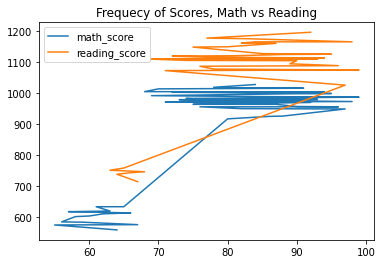

In [55]:
math = school_data_complete['math_score'].value_counts()
read = school_data_complete['reading_score'].value_counts()
math.plot(kind='line', title="Frequecy of Scores, Math vs Reading", legend = True)
read.plot(kind='line', legend = True)
print("\nTrend 1: Overall performance in reading is better over math\n")


Trend 2: Overall performance in Charter schools is 
better over District schools



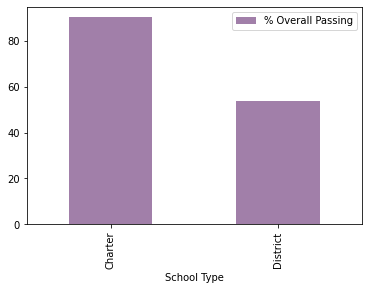

In [207]:
school_type_df['% Overall Passing'].plot.bar(alpha=0.5, colormap ='viridis', legend = True)
print("\nTrend 2: Overall performance in Charter schools is \nbetter over District schools\n")


Trend 3: Overall performance in small and medium size schools 
is better over large schools



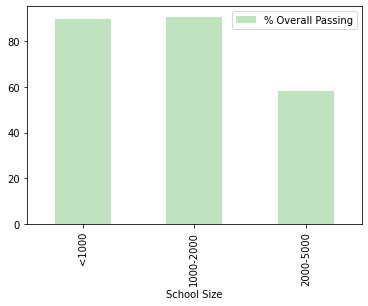

In [206]:
size_df['% Overall Passing'].plot.bar(alpha=0.5, colormap ='Accent', legend = True)
print("\nTrend 3: Overall performance in small and medium size schools \nis better over large schools\n")

In [228]:
# Creating gender summary data
male_df = school_data_complete[school_data_complete['gender']=='M']
female_df = school_data_complete[school_data_complete['gender']=='F']
male_num = male_df['gender'].count()
female_num = female_df['gender'].count()
male_pass = male_df[male_df['both_pass']==True].count()/male_num*100
female_pass = female_df[female_df['both_pass']==True].count()/female_num*100
male_pass['gender'], female_pass['gender']
scores_mean = school_data_complete.groupby('gender')[['math_score', 'reading_score']].mean()
scores_pass = school_data_complete.groupby('gender')[['math_score', 'reading_score']].agg(pass70)
gender_df = pd.concat([scores_mean, scores_pass], join='outer', axis=1)
gender_df['overall_pass'] = [female_pass['gender'], male_pass['gender']]
gender_df['tot_students(%)'] = [female_num/tot_stud*100, male_num/tot_stud*100]
gender_df
print("\nTrend 4: Overall performance among female students is better over male students\n")
gender_df


Trend 4: Overall performance among female students is better over male students



,math_score,reading_score,math_score,reading_score,overall_pass,tot_students(%)
gender,,,,,,
F,79.04,82.00,75.21,86.31,65.73,50.38
M,78.93,81.76,74.75,85.29,64.61,49.62
